In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv'
df=pd.read_csv(url)
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


feature analysis and selection


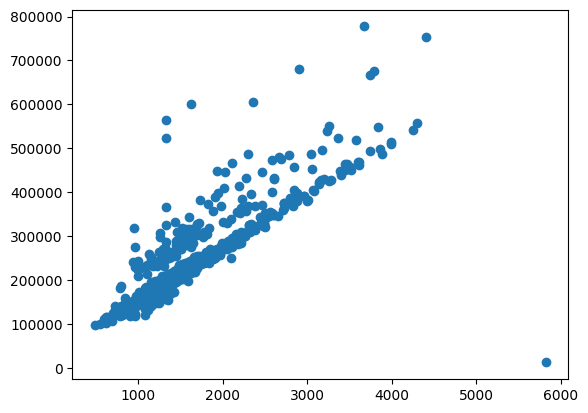

In [3]:
# relation between area and price
plt.scatter(df.SquareFeet, df.Price)

Pearson Correlation: 0.851755035476082


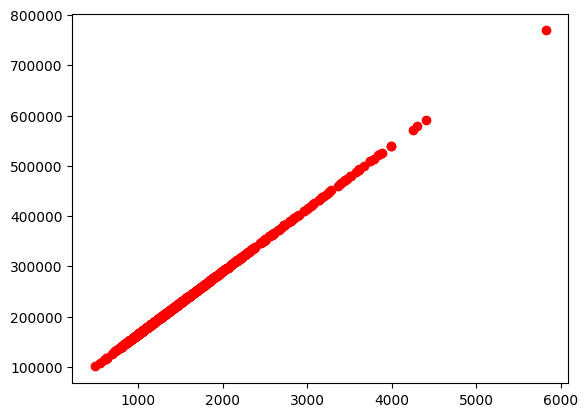

In [4]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(df[['SquareFeet']],df.Price)
pred = model.predict(df[['SquareFeet',]])
plt.scatter(df.SquareFeet,pred,color='red')
#Pearson Correlation
pc=df.SquareFeet.corr(df.Price)
print('Pearson Correlation:',pc)

# Pearson Correlation Coefficient
- If value close to 1, strong positive correlation
- If value close to -1, strong negative corrlation 
- If value close to 0, no correlation

In [5]:
df.select_dtypes(include='number').corrwith(df.Price)

Beds          0.609677
Baths         0.632218
SquareFeet    0.851755
Price         1.000000
dtype: float64

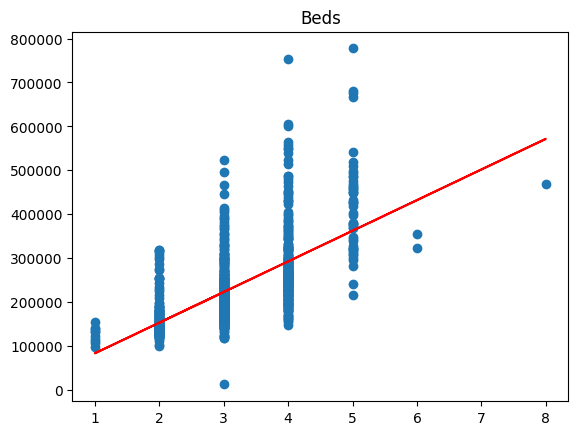

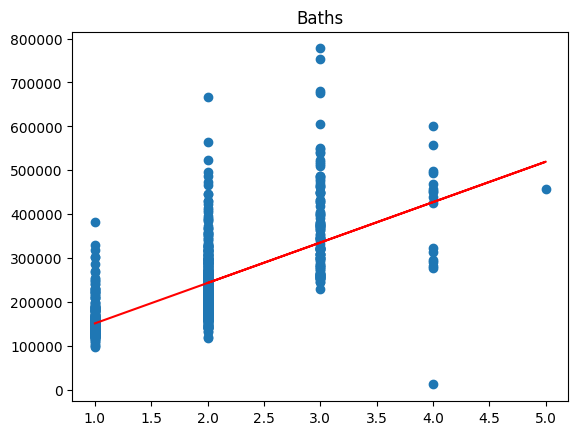

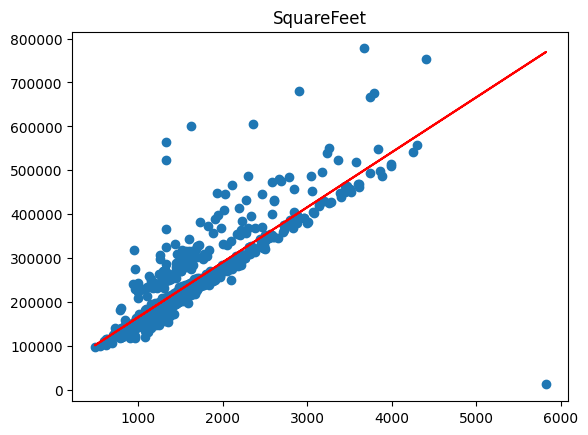

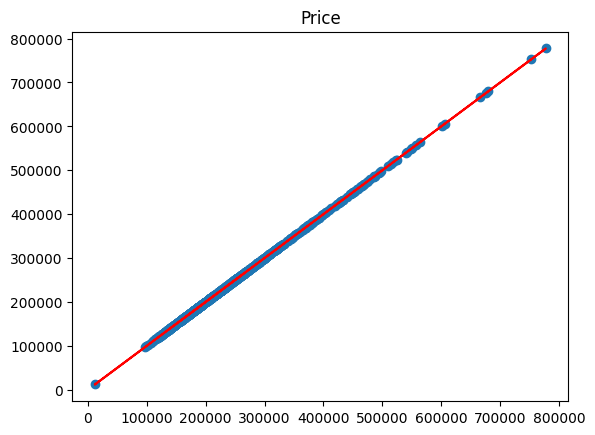

In [6]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.scatter(df[col],df.Price)
    plt.title(col)
    model = LinearRegression()
    model.fit(df[[col]],df.Price)
    plt.plot(df[col],model.predict(df[[col]]),color='red')
    plt.show()

for categorical independent variable with numerical target
 - boxplot analysis(visual)
 - anova test
    - null hypothesis: means of the group are equal 
    - if p-value < 0.05, reject null hypothesis 
    - if p-value > 0.05, fail to reject null hypothesis         

In [7]:
df.columns

Index(['City', 'Type', 'Beds', 'Baths', 'SquareFeet', 'Price'], dtype='object')

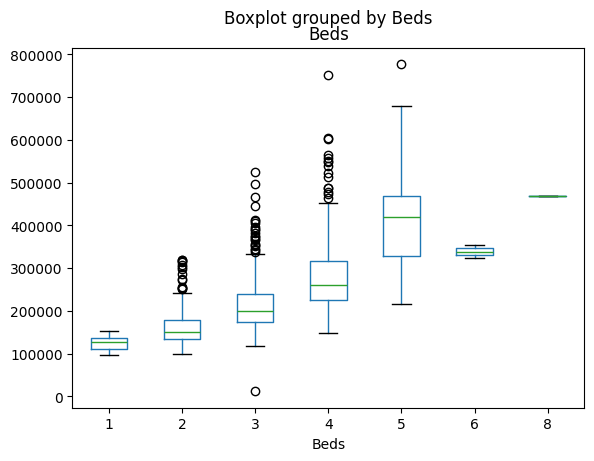

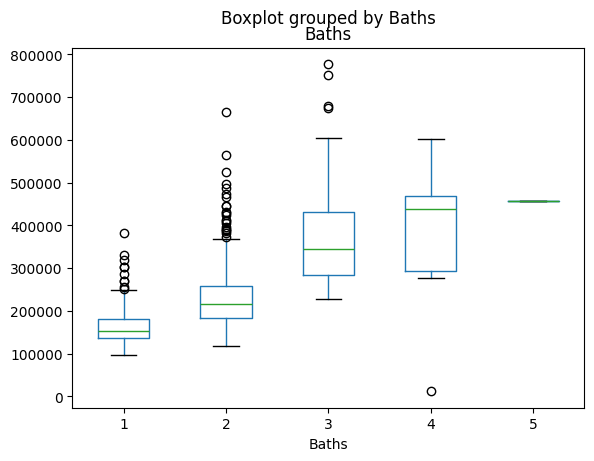

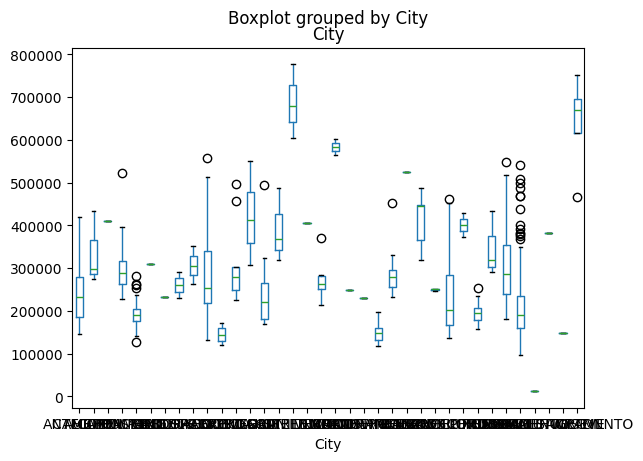

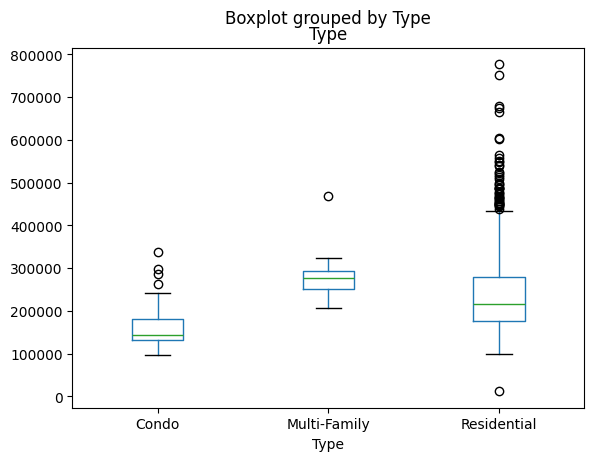

In [8]:
cat_cols = ['Beds','Baths','City','Type']
for col in cat_cols:
    df.boxplot(column='Price',by=col,grid=False)
    plt.title(col)

# testing with anova

- for each feature, calculate the f- stastistic and p- value
- if p-value < 0.05, reject null hypothesis(means the columns is important)
- if p-value > 0.05,  fail to reject null hypothesis(means the columns is not important)

In [9]:
selected_cols=['SquareFeet','Beds','Baths','Type']
X = df[selected_cols]
y=df.Price

In [10]:
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [11]:
X['Baths'].value_counts()

Baths
2    507
1    179
3    110
4     17
5      1
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [13]:
X.head()

,SquareFeet,Beds,Baths,Type
0,836,2,1,Residential
1,1167,3,1,Residential
2,796,2,1,Residential
3,852,2,1,Residential
4,797,2,1,Residential


In [14]:
num_cols = X.select_dtypes(include='number').columns
cat_cols=X.select_dtypes(include='object').columns
num_pipe=Pipeline([
    ('scaler',StandardScaler())
])
cat_pipe = Pipeline([
    ('onehot',OneHotEncoder())
])
preprocessor = ColumnTransformer([
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols)
])
model = Pipeline([
    ('pre',preprocessor),
    ('lr',LinearRegression())
])
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

evaluating the training and testing performance of a model

c:\Users\Hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hp\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hp\miniconda3\Lib\site-packages\sklearn\pipeline.py", line 993, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hp\miniconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^

[ 65 130 195 260 325 390 455 520 585]
[0.77839836 0.85406081 0.8855124  0.84626689 0.82188835 0.82566341
 0.82046707 0.79601211 0.7335621 ]
[       nan 0.68084434 0.69181444 0.69917174 0.69992435 0.70058582
 0.70235974 0.6989901  0.6943628 ]


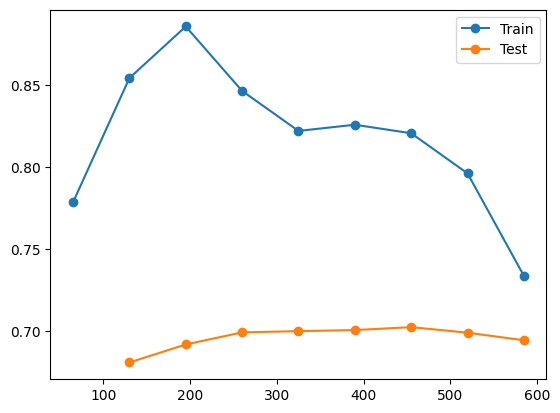

In [15]:
from sklearn.model_selection import learning_curve, cross_val_score
train_sizes = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, 
                                                        train_sizes=train_sizes)
print(train_sizes)
print(train_scores.mean(axis=1))
print(test_scores.mean (axis=1))

#plot learning curve
plt.plot(train_sizes,train_scores.mean(axis=1),label='Train',marker='o')
plt.plot(train_sizes,test_scores.mean(axis=1),label='Test',marker='o')
plt.legend()
plt.show()

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("Training Results")
print("MSE:",mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train,y_train_pred))
print("R2:",r2_score(y_train,y_train_pred))
print('-'*50)
print('Testing Results')
print("MSE:",mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test,y_test_pred))
print("R2:",r2_score(y_test,y_test_pred))

Training Results
MSE: 2694482215.991572
MAE: 26413.810957901478
R2: 0.7201456280637996
--------------------------------------------------
Testing Results
MSE: 2231925679.5943356
MAE: 27204.22787242969
R2: 0.7513720709966819


Model persistance

In [18]:
import joblib
import os
# create a directory to save models
os.makedirs(os.path.join(os.getcwd(),'models'),exist_ok=True)
# save model - dumping
path = os.path.join(os.getcwd(),'models','house_price_model')
joblib.dump(model,path)

['c:\\Users\\Hp\\OneDrive\\Desktop\\PYDS\\AI\\supervised_learning\\models\\house_price_model']

loading a saved model

In [19]:
path = os.path.join(os.getcwd(),'models','house_price_model')
model = joblib.load(path)
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

making predictions with a model

In [20]:
# very simple example data
print(model.predict(X.head()))

[136970.27256815 181947.09630775 132410.36064209 138794.23733858
 132524.35844024]


In [21]:
X.Type.unique().tolist()

['Residential', 'Condo', 'Multi-Family']

In [22]:
X.columns.tolist()

['SquareFeet', 'Beds', 'Baths', 'Type']

In [23]:
# manual data input
inpX = pd.DataFrame({
    'SquareFeet': [2000],
    'Beds': [3],
    'Baths': [2],
    'Type': ['Condo']
})
result = model.predict(inpX)
print(*result, sep ='\n')

296479.9409885875


making a decision tree model , to check the updated memory

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [25]:
model2 = Pipeline([
    ('pre',preprocessor),
    ('dt',DecisionTreeRegressor())
])
model2.fit(X_train,y_train)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print("Training Results")
print("MSE:",mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train,y_train_pred))
print("R2:",r2_score(y_train,y_train_pred))
print('-'*50)
print('Testing Results')
print("MSE:",mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test,y_test_pred))
print("R2:",r2_score(y_test,y_test_pred))

Training Results
MSE: 154192895.19860154
MAE: 2631.605581157194
R2: 0.9839852140842766
--------------------------------------------------
Testing Results
MSE: 2941007211.225088
MAE: 30506.87312883436
R2: 0.6723831179523773


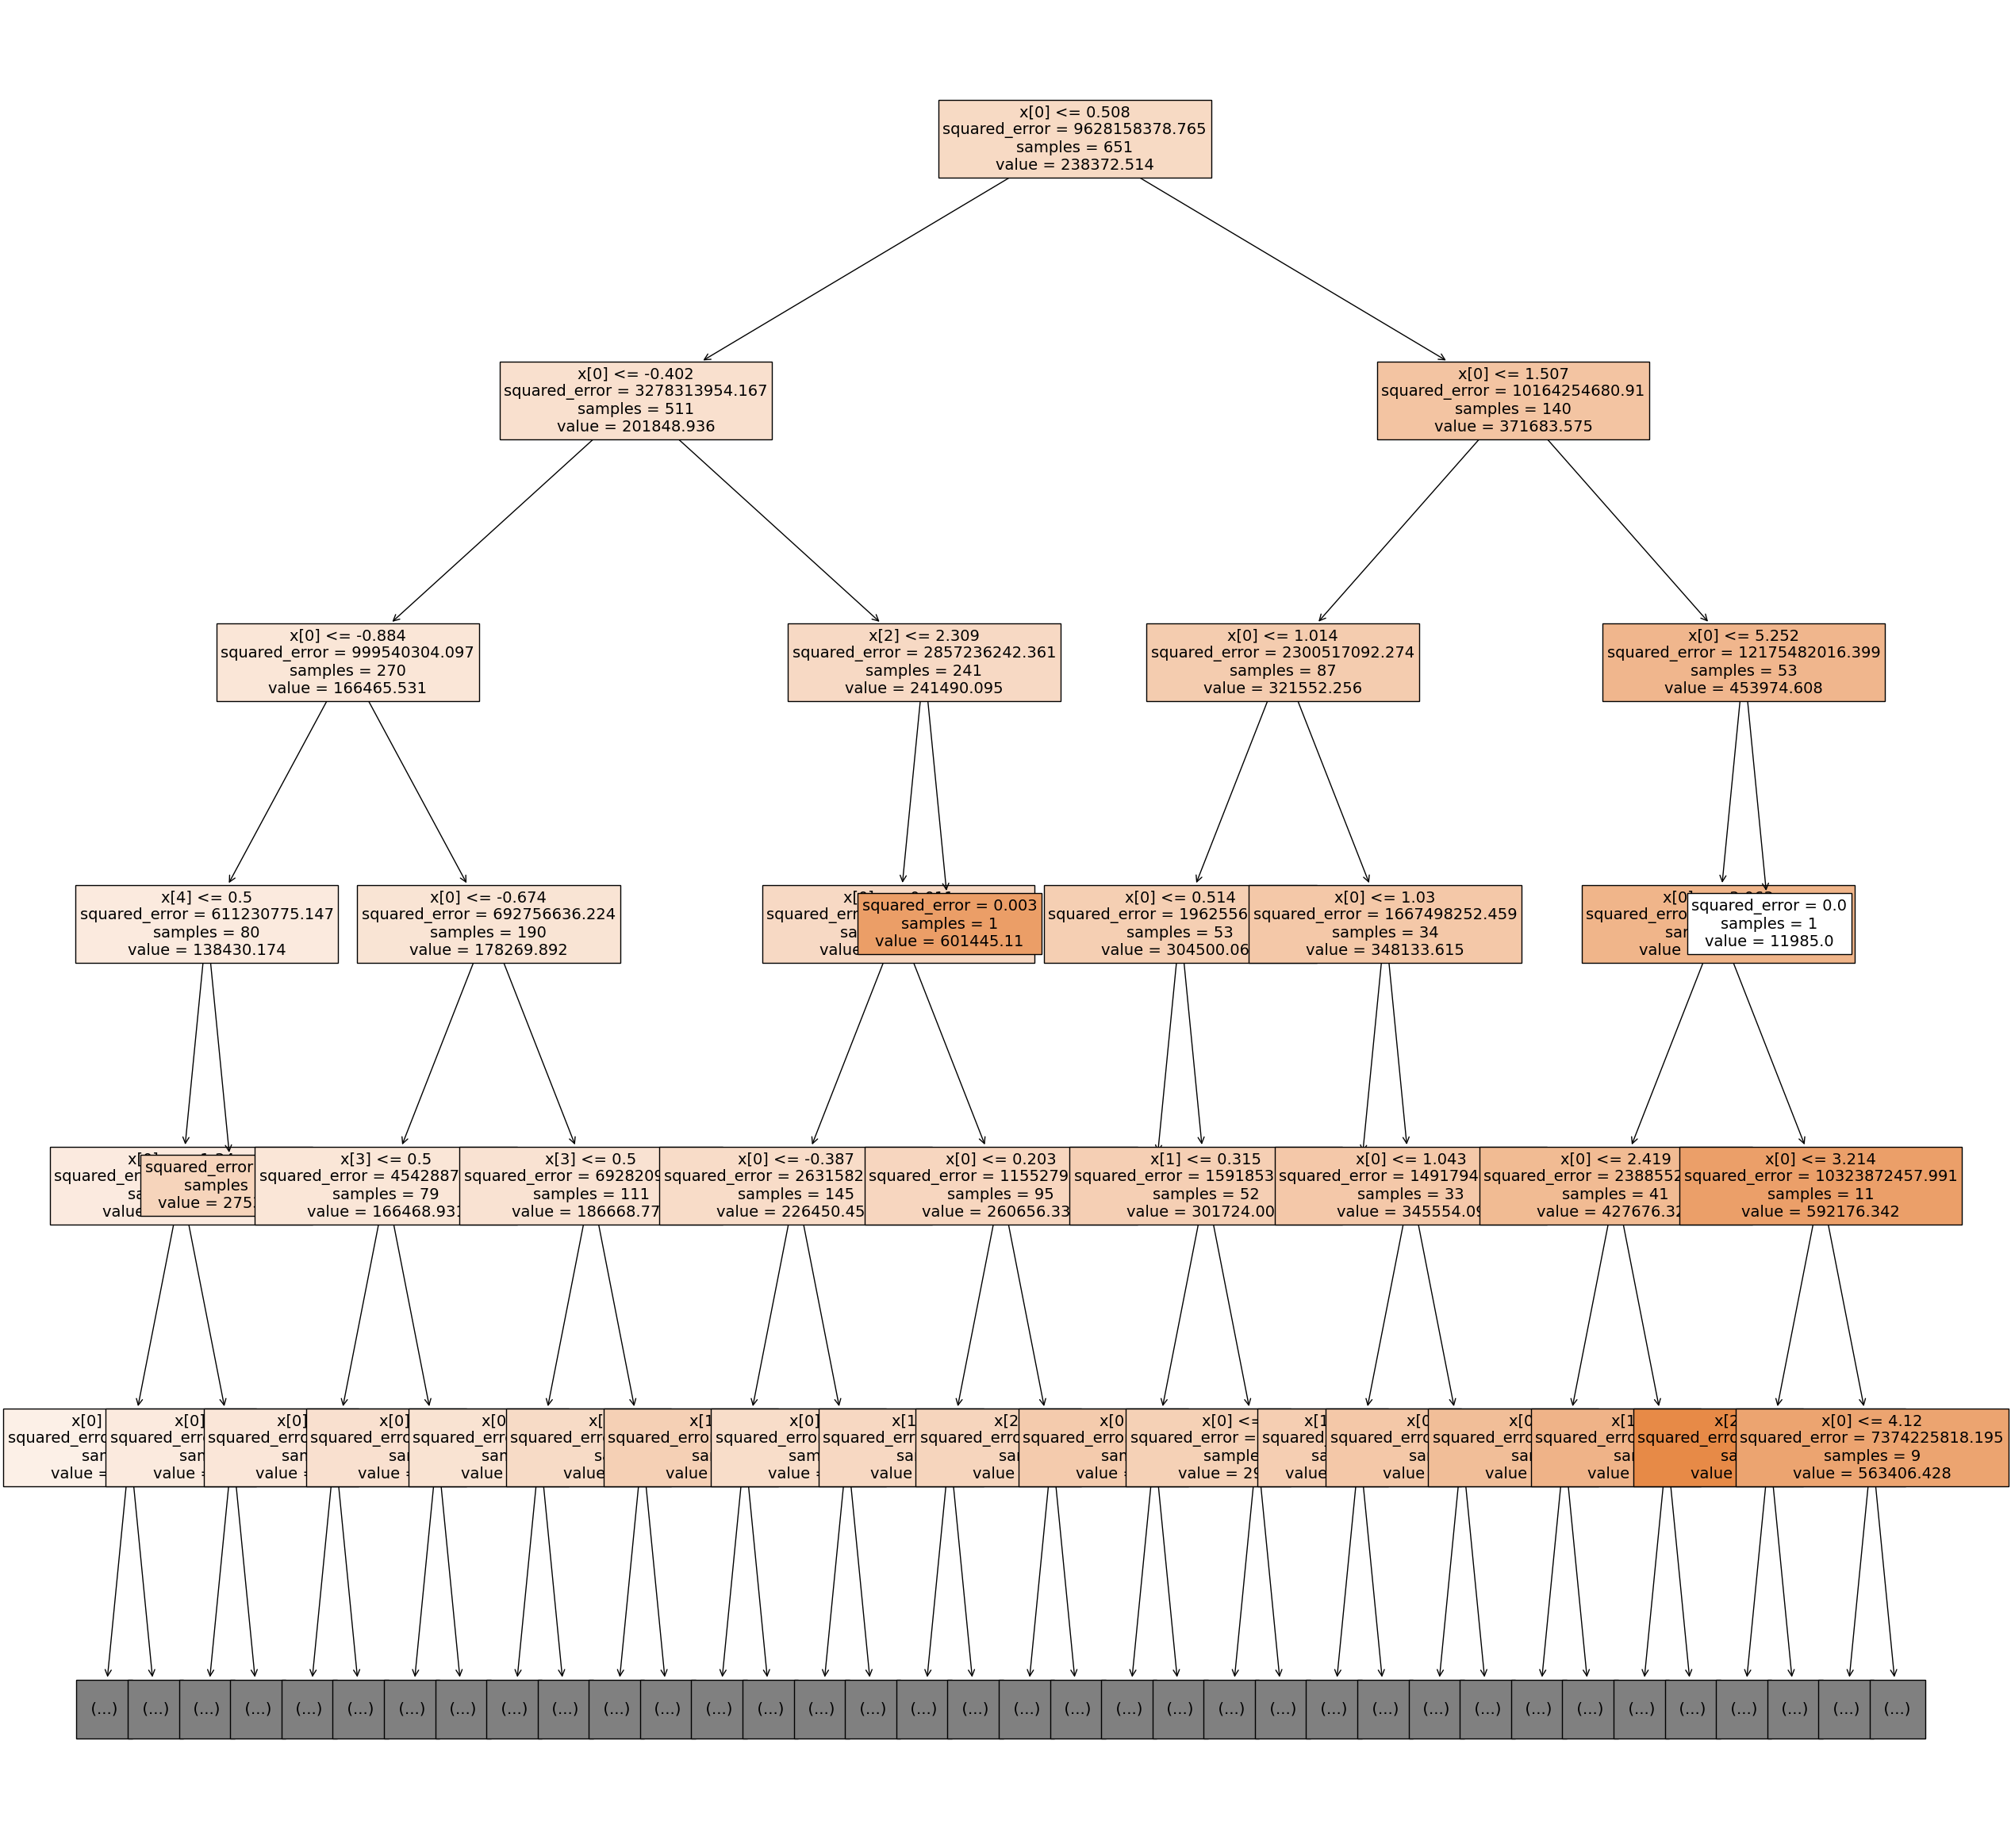

In [26]:
fig = plt.figure(figsize=(30,30))
_= plot_tree(
    model2.named_steps['dt'],
    filled=True,
    max_depth=5,
    fontsize=14
)